In [61]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [62]:
print("Loading data...")
train_data = pd.read_csv('E://m//Genre Classification Dataset//train_data.csv', delimiter='\t')
test_data = pd.read_csv('E://m//Genre Classification Dataset//test_data_solution.txt', delimiter='\t')
test_solution = pd.read_csv('E://m//Genre Classification Dataset//test_data_solution.csv', delimiter='\t')

print("Data loaded successfully!")
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")


Loading data...
Data loaded successfully!
Training data shape: (47934, 1)
Test data shape: (54199, 1)


In [63]:
import pandas as pd
train_data = pd.read_csv('E://m//Genre Classification Dataset//train_data.csv')
print(train_data.head())
print("\nExploring data...")
print(train_data['Genre'].value_counts())


                              Name  Year     Genre  \
0      1 ::: Oscar et la dame rose  2009     drama   
1                      2 ::: Cupid  1997  thriller   
2  3 ::: Young, Wild and Wonderful  1980     adult   
3             4 ::: The Secret Sin  1915     drama   
4            5 ::: The Unrecovered  2007     drama   

                                               Story  
0  Listening in to a conversation between his doc...  
1  A brother and sister with a past incestuous re...  
2  As the bus empties the students for their fiel...  
3  To help their unemployed father make ends meet...  
4  The film's title refers not only to the un-rec...  

Exploring data...
Genre
documentary    12563
drama          12303
comedy          6968
short           4675
horror          1885
thriller        1236
action          1098
western         1005
family           712
music            711
adventure        703
romance          619
adult            584
animation        456
crime            438
sport

In [64]:
print("\nChecking for missing values...")
print(train_data.isnull().sum())



Checking for missing values...
Name     0
Year     0
Genre    0
Story    0
dtype: int64


In [68]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
train_data = pd.read_csv("E://m//Genre Classification Dataset//train_data.csv")
test_data = pd.read_csv("E://m//Genre Classification Dataset//test_data.csv")
print(train_data.columns)
print(test_data.columns)
train_data.columns = train_data.columns.str.strip()
test_data.columns = test_data.columns.str.strip()
train_data['Story'].fillna('', inplace=True)
test_data['Story'].fillna('', inplace=True)
train_data['Story'] = train_data['Story'].astype(str)
test_data['Story'] = test_data['Story'].astype(str)
print("\nVectorizing text data...")
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = vectorizer.fit_transform(train_data['Story'])
X_test = vectorizer.transform(test_data['Story'])

print("Vectorization complete.")


Index(['Name', 'Year', 'Genre', 'Story'], dtype='object')
Index(['Name', 'Year', 'Genre', 'Story'], dtype='object')

Vectorizing text data...


C:\Users\vlaks\AppData\Local\Temp\ipykernel_11392\2953194517.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Story'].fillna('', inplace=True)
C:\Users\vlaks\AppData\Local\Temp\ipykernel_11392\2953194517.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

Vectorization complete.


In [69]:
print(f"Feature matrix shape (train): {X_train.shape}")
print(f"Feature matrix shape (test): {X_test.shape}")

Feature matrix shape (train): (47934, 5000)
Feature matrix shape (test): (52298, 5000)


In [74]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
train_data = pd.read_csv("E://m//Genre Classification Dataset//train_data.csv")
test_data = pd.read_csv("E://m//Genre Classification Dataset//test_data.csv")
test_solution=pd.read_csv("E://m//Genre Classification Dataset//test_data_solution.csv")
print(train_data.columns)
print(test_solution.columns)
train_data.columns = train_data.columns.str.strip()
test_solution.columns = test_solution.columns.str.strip()
train_data['Genre'].fillna('Unknown', inplace=True)
test_solution['Genre'].fillna('Unknown', inplace=True)
train_data['Genre'] = train_data['Genre'].astype(str)
test_solution['Genre'] = test_solution['Genre'].astype(str)
print("\nEncoding target variable (Genres)...")
le = LabelEncoder()
y_train = le.fit_transform(train_data['Genre'])
y_test = le.transform(test_solution['Genre'])

print(f"Encoded classes: {le.classes_}")


Index(['Name', 'Year', 'Genre', 'Story'], dtype='object')
Index(['ID', 'Name', 'Year', 'Genre', 'Story'], dtype='object')

Encoding target variable (Genres)...
Encoded classes: ['action' 'adult' 'adventure' 'animation' 'biography' 'comedy' 'crime'
 'documentary' 'drama' 'family' 'fantasy' 'history' 'horror' 'music'
 'musical' 'mystery' 'news' 'romance' 'short' 'sport' 'thriller' 'war'
 'western']


C:\Users\vlaks\AppData\Local\Temp\ipykernel_11392\3970085861.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Genre'].fillna('Unknown', inplace=True)
C:\Users\vlaks\AppData\Local\Temp\ipykernel_11392\3970085861.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [75]:
print("\nSplitting data for validation...")
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"Training split shape: {X_train_split.shape}, Validation split shape: {X_val_split.shape}")




Splitting data for validation...
Training split shape: (38347, 5000), Validation split shape: (9587, 5000)


In [76]:
print("\nTraining the Logistic Regression model...")
model = LogisticRegression(max_iter=1000, solver='liblinear')


Training the Logistic Regression model...


In [77]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}


In [78]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_split, y_train_split)

print(f"Best parameters found: {grid_search.best_params_}")
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found: {'C': 1, 'penalty': 'l2'}


In [79]:
best_model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000, solver='liblinear')

In [80]:
print("\nEvaluating model on validation data...")
val_predictions = best_model.predict(X_val_split)
val_accuracy = accuracy_score(y_val_split, val_predictions)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Evaluating model on validation data...
Validation Accuracy: 66.68%


In [97]:
print(f"Length of X_train: {X_train.shape[0]}")
print(f"Length of y_train: {len(y_train)}")
print(f"Length of X_test: {X_test.shape[0]}")
print(f"Length of y_test: {len(y_test)}")


Length of X_train: 47934
Length of y_train: 47934
Length of X_test: 52298
Length of y_test: 47900


In [98]:

train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)
test_solution = test_solution.reset_index(drop=True)

print(f"X_train size: {X_train.shape[0]}")
print(f"y_train size: {len(y_train)}")


X_train size: 47934
y_train size: 47934


In [99]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())
print(test_solution.isnull().sum())


Name     0
Year     0
Genre    0
Story    0
dtype: int64
Name     0
Year     0
Genre    0
Story    0
dtype: int64
ID       0
Name     0
Year     0
Genre    0
Story    0
dtype: int64


In [103]:
# If X_train and X_test are sparse matrices, convert them to dense arrays first
X_train_dense = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test_dense = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

# Ensure X and y are aligned and consistent
X_train_df = pd.DataFrame(X_train_dense).reset_index(drop=True)
y_train_df = pd.Series(y_train).reset_index(drop=True)

X_test_df = pd.DataFrame(X_test_dense).reset_index(drop=True)
y_test_df = pd.Series(y_test).reset_index(drop=True)

# Check alignment before training/testing
print(f"X_train length: {X_train_df.shape[0]}, y_train length: {len(y_train_df)}")
print(f"X_test length: {X_test_df.shape[0]}, y_test length: {len(y_test_df)}")


X_train length: 47934, y_train length: 47934
X_test length: 52298, y_test length: 47900


In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_df)
X_test_scaled = scaler.transform(X_test_df)


In [106]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train_df, test_size=0.2, random_state=42)


In [107]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
val_predictions = model.predict(X_val)
from sklearn.metrics import accuracy_score
print(f"Validation Accuracy: {accuracy_score(y_val, val_predictions)}")


Validation Accuracy: 0.48388442682799626


e:\m\Genre Classification Dataset\nenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [109]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print(f"Best Parameters: {grid.best_params_}")


e:\m\Genre Classification Dataset\nenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
e:\m\Genre Classification Dataset\nenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Best Parameters: {'C': 0.01, 'penalty': 'l2'}


In [110]:
test_predictions = model.predict(X_test_scaled)

In [144]:
print(y_test_df.shape)
print(test_predictions.shape)


(47900,)
(52298,)


In [145]:
test_predictions = test_predictions[:len(y_test_df)]


In [146]:
from sklearn.metrics import classification_report

print(classification_report(y_test_df, test_predictions))


              precision    recall  f1-score   support

           0       0.02      0.01      0.01      1103
           1       0.00      0.00      0.00       586
           2       0.02      0.01      0.01       708
           3       0.00      0.00      0.00       457
           4       0.00      0.00      0.00       219
           5       0.15      0.16      0.15      6967
           6       0.00      0.00      0.00       428
           7       0.26      0.34      0.29     12576
           8       0.26      0.36      0.30     12310
           9       0.05      0.01      0.01       714
          10       0.00      0.00      0.00       256
          11       0.00      0.00      0.00       219
          12       0.04      0.03      0.03      1895
          13       0.01      0.00      0.01       715
          14       0.00      0.00      0.00       268
          15       0.00      0.00      0.00       276
          16       0.00      0.00      0.00       178
          17       0.00    

e:\m\Genre Classification Dataset\nenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\m\Genre Classification Dataset\nenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\m\Genre Classification Dataset\nenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [150]:
import joblib
joblib.dump(model, 'final_model.pkl')
model = joblib.load('final_model.pkl')


In [152]:
print("Shape of y_test_df:", y_test_df.shape)
print("Shape of test_predictions:", test_predictions.shape)


Shape of y_test_df: (47900,)
Shape of test_predictions: (52298,)


In [153]:
test_predictions = test_predictions[:len(y_test_df)]


In [154]:
y_test_df = y_test_df[:len(test_predictions)]


In [155]:
from sklearn.metrics import classification_report
print(classification_report(y_test_df, test_predictions))


              precision    recall  f1-score   support

           0       0.02      0.01      0.01      1103
           1       0.00      0.00      0.00       586
           2       0.02      0.01      0.01       708
           3       0.00      0.00      0.00       457
           4       0.00      0.00      0.00       219
           5       0.15      0.16      0.15      6967
           6       0.00      0.00      0.00       428
           7       0.26      0.34      0.29     12576
           8       0.26      0.36      0.30     12310
           9       0.05      0.01      0.01       714
          10       0.00      0.00      0.00       256
          11       0.00      0.00      0.00       219
          12       0.04      0.03      0.03      1895
          13       0.01      0.00      0.01       715
          14       0.00      0.00      0.00       268
          15       0.00      0.00      0.00       276
          16       0.00      0.00      0.00       178
          17       0.00    

e:\m\Genre Classification Dataset\nenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\m\Genre Classification Dataset\nenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\m\Genre Classification Dataset\nenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [161]:
print(len(y_test))
print(len(test_predictions))


47900
52298


In [162]:
# Example to align lengths
test_predictions = test_predictions[:len(y_test)]


In [163]:
print("\nClassification Report on Test Data:")
print(classification_report(y_test, test_predictions, target_names=le.classes_))



Classification Report on Test Data:
              precision    recall  f1-score   support

      action       0.02      0.01      0.01      1103
       adult       0.00      0.00      0.00       586
   adventure       0.02      0.01      0.01       708
   animation       0.00      0.00      0.00       457
   biography       0.00      0.00      0.00       219
      comedy       0.15      0.16      0.15      6967
       crime       0.00      0.00      0.00       428
 documentary       0.26      0.34      0.29     12576
       drama       0.26      0.36      0.30     12310
      family       0.05      0.01      0.01       714
     fantasy       0.00      0.00      0.00       256
     history       0.00      0.00      0.00       219
      horror       0.04      0.03      0.03      1895
       music       0.01      0.00      0.01       715
     musical       0.00      0.00      0.00       268
     mystery       0.00      0.00      0.00       276
        news       0.00      0.00      0.00 

e:\m\Genre Classification Dataset\nenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\m\Genre Classification Dataset\nenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\m\Genre Classification Dataset\nenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

Confusion Matrix:


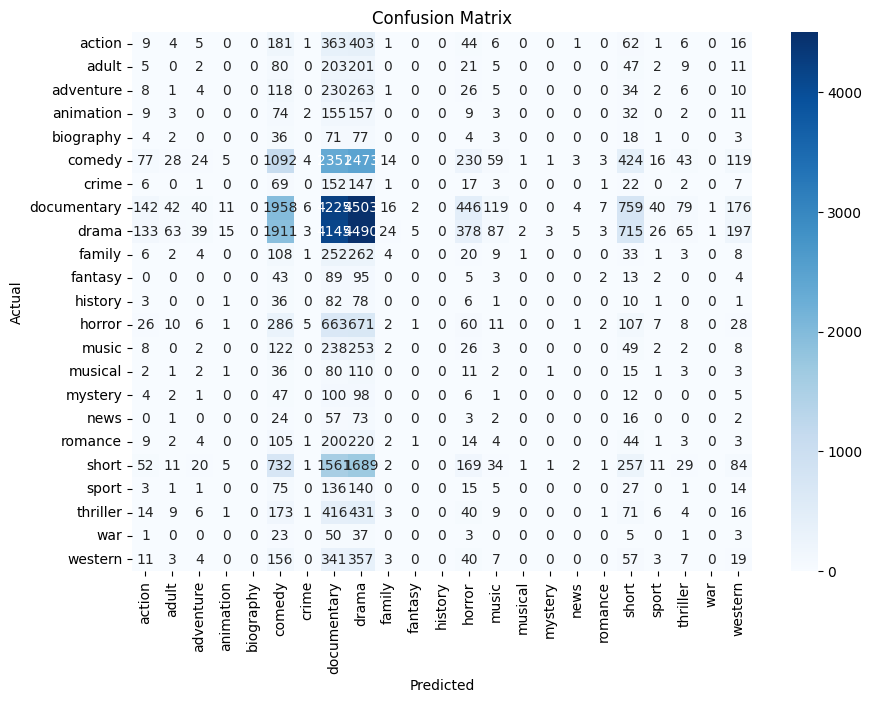

In [164]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [165]:
import joblib
joblib.dump(best_model, 'movie_genre_classifier.pkl')
print("Model saved as movie_genre_classifier.pkl")


Model saved as movie_genre_classifier.pkl


In [170]:
loaded_model = joblib.load('movie_genre_classifier.pkl')
new_predictions = loaded_model.predict(X_test)
